In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
path = "D:\Download\Data Science\Random Forest\Random Forest\glass.xlsx"
sheet_name = 'glass'

data = pd.read_excel(path, sheet_name)
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
data.shape

(214, 10)

In [4]:
data['Type'].unique()

array([1, 2, 3, 5, 6, 7])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
df = data.copy()

In [7]:
cols_to_treat = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type']

for col in cols_to_treat:
    mean = df[col].mean()
    median = df[col].median()
    std = df[col].std()
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

df = df[(df[col] >= lower) & (df[col] <= upper)]

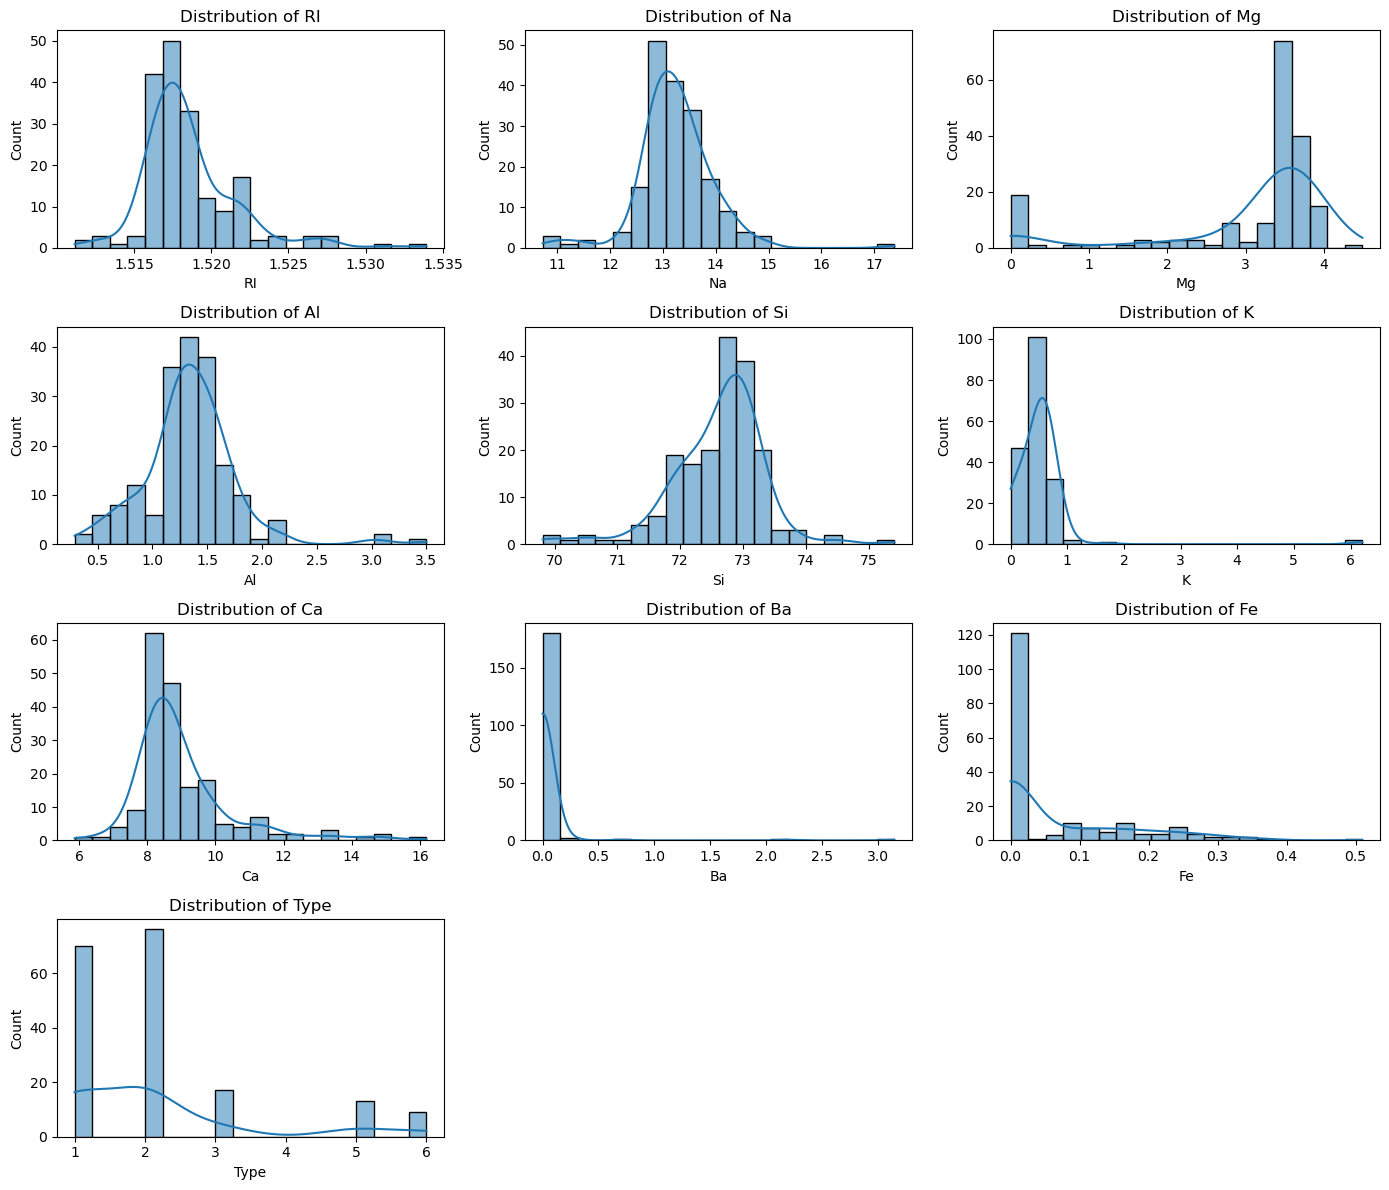

In [8]:
import math
plt.figure(figsize = (14,12))
num_cols = len(df.columns)
rows = math.ceil(num_cols/3)

for i, col in enumerate(df.columns, 1):
    plt.subplot(rows, 3, i)
    sns.histplot(df[col], kde=True, bins=20)
    plt.xlabel(col)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

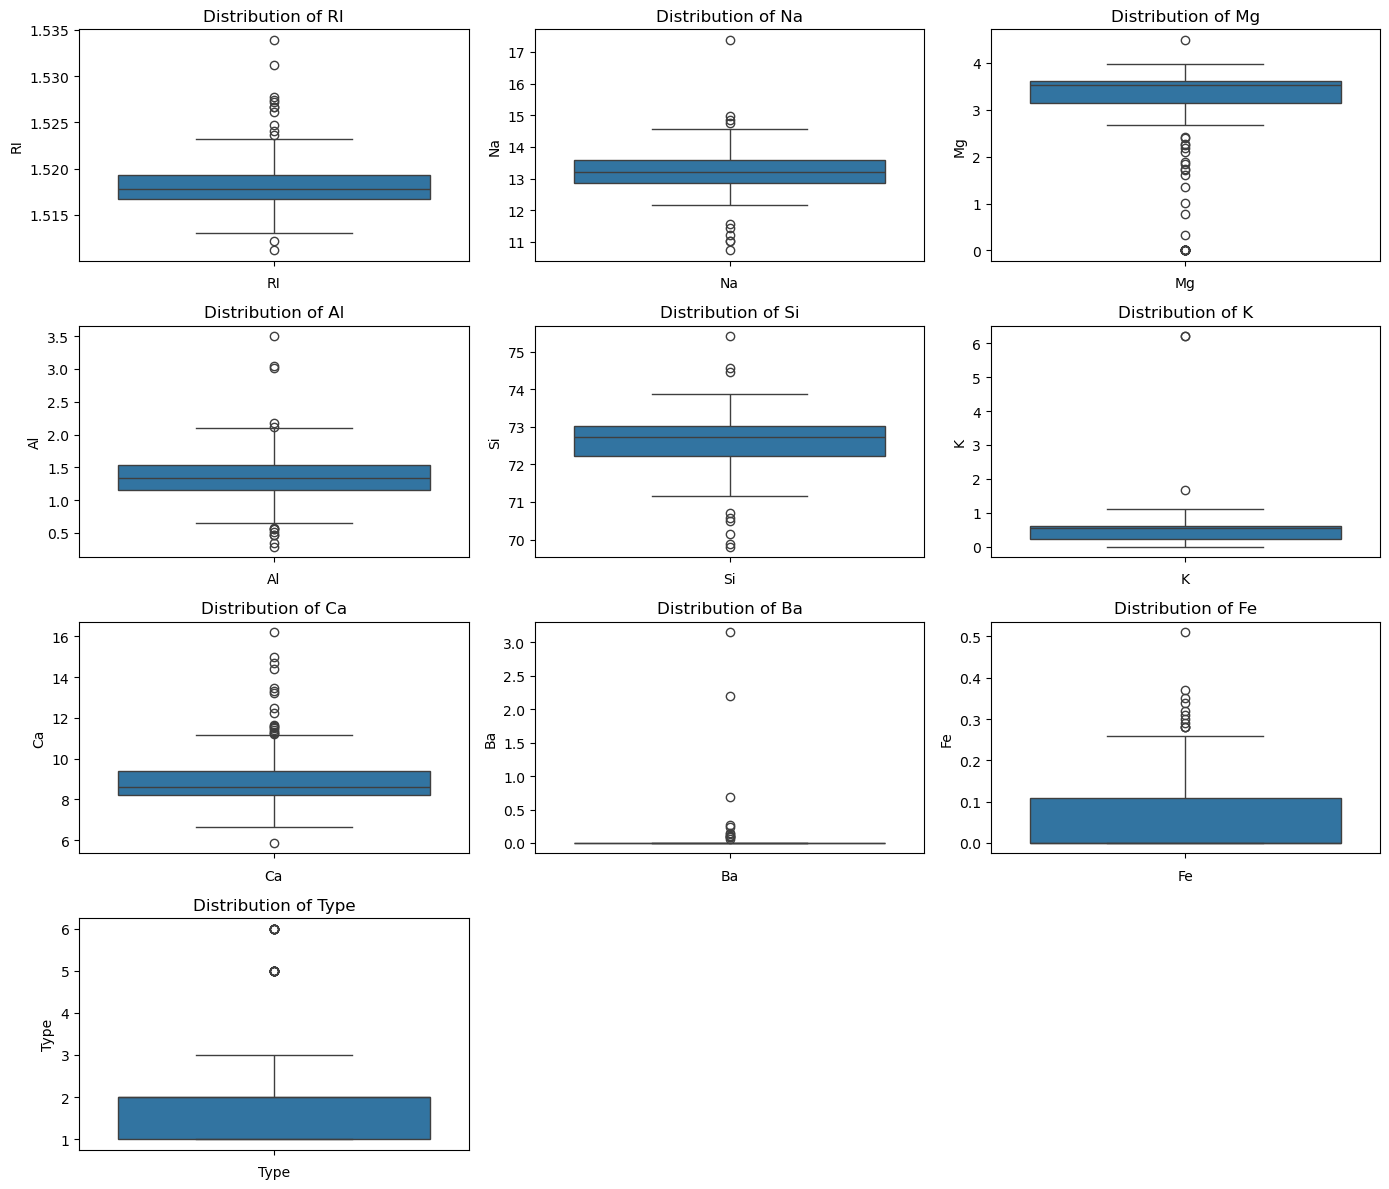

In [9]:
plt.figure(figsize = (14,12))
num_cols = len(df.columns)
rows = math.ceil(num_cols/3)

for i, col in enumerate(df.columns, 1):
    plt.subplot(rows, 3, i)
    sns.boxplot(df[col])
    plt.xlabel(col)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

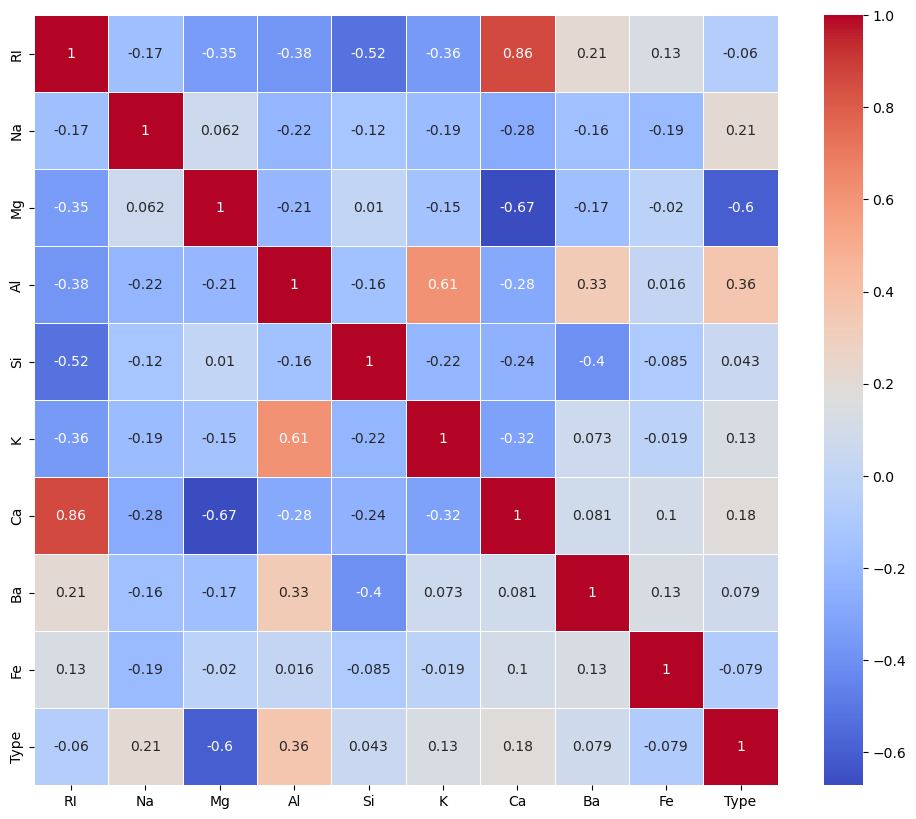

In [10]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

corr_matrix = df[num_cols].corr()
corr_matrix = corr_matrix.dropna(axis=0, how='all').dropna(axis=1, how='all')

plt.figure(figsize = (12,10))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', linewidth = 0.5)
plt.show()

In [11]:
num_cols = df.select_dtypes(include = ['int64', 'float64']).columns.tolist()
#df[num_cols] = scaler.fit_transform(df[num_cols])

In [12]:
X  = df.drop('Type',axis=1)
y = df['Type']

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
np.round(X_scaled.mean(axis=0)[:5],6)

array([ 0., -0.,  0., -0.,  0.])

In [15]:
np.round(X_scaled.std(axis=0)[:5],6)

array([1., 1., 1., 1., 1.])

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42,n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [18]:
y_pred = rf.predict(X_test)

In [19]:
print(y_pred)

[1 6 6 1 1 1 2 1 1 2 1 5 1 2 1 2 2 6 1 1 3 1 5 2 1 2 1 1 2 1 2 3 2 2 2 1 2]


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

accuracy_score(y_test, y_pred)

0.8108108108108109

In [21]:
precision_score(y_test, y_pred, average='weighted')

0.830581712934654

In [22]:
recall_score(y_test, y_pred, average='weighted')

0.8108108108108109

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.76      0.93      0.84        14
           2       0.85      0.73      0.79        15
           3       1.00      0.67      0.80         3
           5       1.00      0.67      0.80         3
           6       0.67      1.00      0.80         2

    accuracy                           0.81        37
   macro avg       0.86      0.80      0.80        37
weighted avg       0.83      0.81      0.81        37



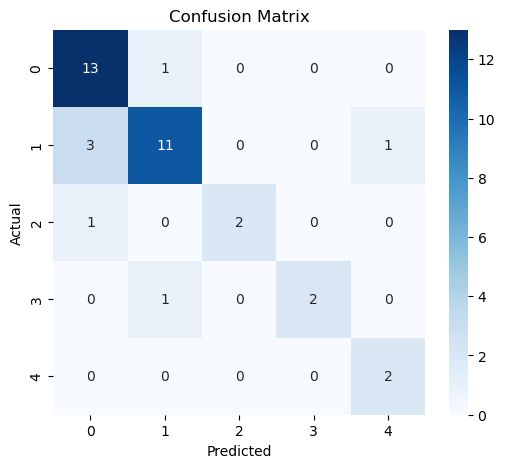

In [24]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [25]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [26]:
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=200,
    random_state=42
)

bagging.fit(X_train, y_train)
y_pred_bag = bagging.predict(X_test)


In [27]:
print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bag))


Bagging Accuracy: 0.7837837837837838


In [28]:
boost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=200,
    learning_rate=0.5,
    random_state=42
)

boost.fit(X_train, y_train)
y_pred_boost = boost.predict(X_test)


In [29]:
print("Boosting Accuracy:", accuracy_score(y_test, y_pred_boost))

Boosting Accuracy: 0.5945945945945946


In [30]:
results = pd.DataFrame({
    'Model': ['Random Forest', 'Bagging', 'Boosting'],
    'Accuracy': [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_bag),
        accuracy_score(y_test, y_pred_boost)
    ]
})

results

,Model,Accuracy
0,Random Forest,0.810811
1,Bagging,0.783784
2,Boosting,0.594595
